<a href="https://colab.research.google.com/github/yRavi21/YouTube-sentiment-analysis/blob/main/YouTube_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation

In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.1 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv("df.csv")
data2 = pd.read_csv("df2.csv")

In [ ]:
data.head(5)

,Unnamed: 0,author,published_at,like_count,text,video_id,public
0,0,@thedeshbhakt,2024-02-28T15:34:25Z,150,Download Probo and Earn bonuses- https://probo...,6RX-39Mn-w8,True
1,1,@pushpindersingh4singh408,2024-04-27T06:52:46Z,1,Indian system murdabad indian politician murda...,6RX-39Mn-w8,True
2,2,@pushpindersingh4singh408,2024-04-27T06:51:51Z,1,Abhi tu maa badqismat samjha tu hoo ki maa kiy...,6RX-39Mn-w8,True
3,3,@mrjabhi,2024-04-26T19:14:06Z,0,Honestly this is not the first time ...but you...,6RX-39Mn-w8,True
4,4,@abhisheksing8379,2024-04-26T03:28:01Z,0,Previous generations who procreated mindlessly...,6RX-39Mn-w8,True


In [ ]:
data2.head(5)

,Unnamed: 0,author,published_at,like_count,text,video_id,public
0,0,@Firstpost,2023-10-07T14:28:00Z,116.0,Do you think caste reservation should be ended...,E6kBtvOrEME,True
1,1,@Seevawonderloaf,2024-04-27T09:24:55Z,0.0,1:43 Palki your work is great but this is what...,E6kBtvOrEME,True
2,2,@Seevawonderloaf,2024-04-27T09:23:44Z,0.0,The ruling party doesn’t want the census becau...,E6kBtvOrEME,True
3,3,@heenachoudhary,2024-04-26T16:33:30Z,0.0,Would like to have the transcript of this vide...,E6kBtvOrEME,True
4,4,@RnjyNishad,2024-04-25T01:12:55Z,0.0,Sabse jyada Reservation Brahman ke pass hai.\n...,E6kBtvOrEME,True


In [ ]:
data1=data.drop(['Unnamed: 0','like_count','public','author','published_at'],axis=1)
data3=data2.drop(['Unnamed: 0','like_count','public','author','published_at'],axis=1)
data1

,text,video_id
0,Download Probo and Earn bonuses- https://probo...,6RX-39Mn-w8
1,Indian system murdabad indian politician murda...,6RX-39Mn-w8
2,Abhi tu maa badqismat samjha tu hoo ki maa kiy...,6RX-39Mn-w8
3,Honestly this is not the first time ...but you...,6RX-39Mn-w8
4,Previous generations who procreated mindlessly...,6RX-39Mn-w8
...,...,...
5434,Israel ❤❤❤❤❤,S_Ef7qeGr0M
5435,After reading Quran and hadeeth \nMy respect f...,S_Ef7qeGr0M
5436,maam you have done a great job at the debate y...,S_Ef7qeGr0M
5437,"Playing stupid games, now paying stupid price. 😂",S_Ef7qeGr0M


In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_processing(text):
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)

    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)

    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)

    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])

    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])

    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [ ]:
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
data_copy = data1.copy()
data_copy.Comment = data_copy.text.apply(lambda text: text_processing(text))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


AttributeError: 'float' object has no attribute 'lower'

In [ ]:
data_copy2 = data3.copy()

In [ ]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [ ]:
processed_data = {
    'Sentence':data_copy.Comment,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

In [ ]:
processed_data['Sentiment'].value_counts()

In [ ]:
pip install beautifulsoup4

In [ ]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=635e8e059dd5fc6a5e304daee7fce8c26b86900fce7706019f4945fbf417475a
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
import re
import string
import nltk
from bs4 import BeautifulSoup
from autocorrect import Speller
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
import emoji

# Download necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
spell = Speller(lang='en')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

# Lowercasing
def to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return str(text).lower()

# Remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Spelling corrections
def correct_spelling(text):
    return spell(text)

# Remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words])

# Handle emojis
def handle_emojis(text):
    return emoji.demojize(text)

# Tokenization
def word_tokenize_text(text):
    return word_tokenize(text)

def sentence_tokenize_text(text):
    return sent_tokenize(text)

# Stemming
def stem_text(text, method='porter'):
    if method == 'porter':
        return ' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    elif method == 'lancaster':
        return ' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    elif method == 'snowball':
        return ' '.join([snowball_stemmer.stem(word) for word in word_tokenize(text)])
    else:
        raise ValueError("Invalid method for stemming. Choose 'porter', 'lancaster', or 'snowball'.")

# Lemmatization
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

# Combined function for text processing
def text_processing(text, use_stemming=False, stemming_method='porter', use_lemmatization=True, tokenize_by_sentence=False):
    text = to_lowercase(text)
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = correct_spelling(text)
    text = handle_emojis(text)
    text = remove_stopwords(text)

    if tokenize_by_sentence:
        tokens = sentence_tokenize_text(text)
    else:
        tokens = word_tokenize_text(text)

    if use_stemming:
        return stem_text(' '.join(tokens), method=stemming_method)
    elif use_lemmatization:
        return lemmatize_text(' '.join(tokens))
    else:
        return ' '.join(tokens)


In [ ]:
data_copy.head()

,text,video_id
0,Download Probo and Earn bonuses- https://probo...,6RX-39Mn-w8
1,Indian system murdabad indian politician murda...,6RX-39Mn-w8
2,Abhi tu maa badqismat samjha tu hoo ki maa kiy...,6RX-39Mn-w8
3,Honestly this is not the first time ...but you...,6RX-39Mn-w8
4,Previous generations who procreated mindlessly...,6RX-39Mn-w8


In [ ]:
# Preprocess comments with different methods
data_copy['processed_with_stemming'] = data_copy['text'].apply(lambda x: text_processing(x, use_stemming=True, stemming_method='porter'))
data_copy['processed_with_lemmatization'] = data_copy['text'].apply(lambda x: text_processing(x, use_stemming=False, use_lemmatization=True))
data_copy['processed_with_sentence_tokenization'] = data_copy['text'].apply(lambda x: text_processing(x, use_stemming=False, use_lemmatization=True, tokenize_by_sentence=True))

print(data_copy)


<ipython-input-22-5d661114fc9d>:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
<ipython-input-22-5d661114fc9d>:33: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
<ipython-input-22-5d661114fc9d>:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
<ipython-input-22-5d661114fc9d>:33: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that

                                                   text     video_id  \
0     Download Probo and Earn bonuses- https://probo...  6RX-39Mn-w8   
1     Indian system murdabad indian politician murda...  6RX-39Mn-w8   
2     Abhi tu maa badqismat samjha tu hoo ki maa kiy...  6RX-39Mn-w8   
3     Honestly this is not the first time ...but you...  6RX-39Mn-w8   
4     Previous generations who procreated mindlessly...  6RX-39Mn-w8   
...                                                 ...          ...   
5434                                       Israel ❤❤❤❤❤  S_Ef7qeGr0M   
5435  After reading Quran and hadeeth \nMy respect f...  S_Ef7qeGr0M   
5436  maam you have done a great job at the debate y...  S_Ef7qeGr0M   
5437   Playing stupid games, now paying stupid price. 😂  S_Ef7qeGr0M   
5438                    Vampire Benja is blood thirsty.  S_Ef7qeGr0M   

                                processed_with_stemming  \
0                             download probe earn bonus   
1     indian syst

In [ ]:
data_copy2['processed_with_stemming'] = data_copy2['text'].apply(lambda x: text_processing(x, use_stemming=True, stemming_method='porter'))
data_copy2['processed_with_lemmatization'] = data_copy2['text'].apply(lambda x: text_processing(x, use_stemming=False, use_lemmatization=True))
data_copy2['processed_with_sentence_tokenization'] = data_copy2['text'].apply(lambda x: text_processing(x, use_stemming=False, use_lemmatization=True, tokenize_by_sentence=True))
data_copy2

<ipython-input-22-5d661114fc9d>:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
<ipython-input-22-5d661114fc9d>:33: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
<ipython-input-22-5d661114fc9d>:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
<ipython-input-22-5d661114fc9d>:33: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that

,text,video_id,processed_with_stemming,processed_with_lemmatization,processed_with_sentence_tokenization
0,Do you think caste reservation should be ended...,E6kBtvOrEME,think cast reserv end comment join convers,think caste reservation ended comment join con...,think caste reservation ended comment join con...
1,1:43 Palki your work is great but this is what...,E6kBtvOrEME,143 talk work great british interpret ’ use va...,143 talk work great british interpreted ’ used...,143 talk work great british interpreted ’ used...
2,The ruling party doesn’t want the census becau...,E6kBtvOrEME,rule parti ’ want censu want unit everyon oppo...,ruling party ’ want census want unite everyone...,ruling party ’ want census want unite everyone...
3,Would like to have the transcript of this vide...,E6kBtvOrEME,would like transcript video,would like transcript video,would like transcript video
4,Sabse jyada Reservation Brahman ke pass hai.\n...,E6kBtvOrEME,sabr yada reserv rahman ke pass hai anchor als...,sabre yada reservation rahman ke pas hai ancho...,sabre yada reservation rahman ke pas hai ancho...
...,...,...,...,...,...
29618,India india 🇮🇳🇮🇳🇮🇳,rW_fwcmyIfk,india india : india : : india : : india :,india india : India : : India : : India :,india india : India : : India : : India :
29619,Jai ho india. \nJai ho neeraj baisaab. \nMonu ...,rW_fwcmyIfk,jai ho india jai ho neural baisaab mon baisaab...,jai ho india jai ho neural baisaab mon baisaab...,jai ho india jai ho neural baisaab mon baisaab...
29620,First,rW_fwcmyIfk,first,first,first
29621,1 st view,rW_fwcmyIfk,1 st view,1 st view,1 st view


In [ ]:
data_copy2

,text,video_id,processed_with_stemming,processed_with_lemmatization,processed_with_sentence_tokenization
0,Do you think caste reservation should be ended...,E6kBtvOrEME,think cast reserv end comment join convers,think caste reservation ended comment join con...,think caste reservation ended comment join con...
1,1:43 Palki your work is great but this is what...,E6kBtvOrEME,143 talk work great british interpret ’ use va...,143 talk work great british interpreted ’ used...,143 talk work great british interpreted ’ used...
2,The ruling party doesn’t want the census becau...,E6kBtvOrEME,rule parti ’ want censu want unit everyon oppo...,ruling party ’ want census want unite everyone...,ruling party ’ want census want unite everyone...
3,Would like to have the transcript of this vide...,E6kBtvOrEME,would like transcript video,would like transcript video,would like transcript video
4,Sabse jyada Reservation Brahman ke pass hai.\n...,E6kBtvOrEME,sabr yada reserv rahman ke pass hai anchor als...,sabre yada reservation rahman ke pas hai ancho...,sabre yada reservation rahman ke pas hai ancho...
...,...,...,...,...,...
29618,India india 🇮🇳🇮🇳🇮🇳,rW_fwcmyIfk,india india : india : : india : : india :,india india : India : : India : : India :,india india : India : : India : : India :
29619,Jai ho india. \nJai ho neeraj baisaab. \nMonu ...,rW_fwcmyIfk,jai ho india jai ho neural baisaab mon baisaab...,jai ho india jai ho neural baisaab mon baisaab...,jai ho india jai ho neural baisaab mon baisaab...
29620,First,rW_fwcmyIfk,first,first,first
29621,1 st view,rW_fwcmyIfk,1 st view,1 st view,1 st view


In [ ]:
from google.colab import files
df_processed.to_csv('df_processed.csv')
files.download('df_processed.csv')

NameError: name 'data_copy' is not defined

In [ ]:
from google.colab import files
df_processed.to_csv('df_processed.csv')
files.download('df_processed.csv')
df_processed2.to_csv('df_processed2.csv')
files.download('df_processed2.csv')

NameError: name 'data_copy2' is not defined

In [ ]:
df_processed = pd.read_csv('df_processed.csv')

In [ ]:
df_processed2 = pd.read_csv('df_processed2.csv')

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df_processed['processed_with_stemming'] = df_processed['processed_with_stemming'].apply(lambda x: ''.join(x))

TypeError: can only join an iterable

In [ ]:
# Function to perform sentiment analysis using NLTK Vader
def analyze_sentiment_vader(text):
    sid = SentimentIntensityAnalyzer()
    compound_score = sid.polarity_scores(text)['compound']
    return 'positive' if compound_score > 0 else 'negative' if compound_score < 0 else 'neutral'

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

# Ensure all text data is in string format
df_processed['processed_with_stemming'] = df_processed['processed_with_stemming'].astype(str)
df_processed['processed_with_lemmatization'] = df_processed['processed_with_lemmatization'].astype(str)
df_processed['processed_with_sentence_tokenization'] = df_processed['processed_with_sentence_tokenization'].astype(str)

# Perform sentiment analysis using NLTK Vader
df_processed['stemming_Sentiment_Vader'] = df_processed['processed_with_stemming'].apply(analyze_sentiment_vader)
df_processed['lemmatization_Sentiment_Vader'] = df_processed['processed_with_lemmatization'].apply(analyze_sentiment_vader)
df_processed['sentence_tokenization_Sentiment_Vader'] = df_processed['processed_with_sentence_tokenization'].apply(analyze_sentiment_vader)

# Perform sentiment analysis using TextBlob
df_processed['stemming_Sentiment_TextBlob'] = df_processed['processed_with_stemming'].apply(analyze_sentiment_textblob)
df_processed['lemmatization_Sentiment_TextBlob'] = df_processed['processed_with_lemmatization'].apply(analyze_sentiment_textblob)
df_processed['sentence_tokenization_Sentiment_TextBlob'] = df_processed['processed_with_sentence_tokenization'].apply(analyze_sentiment_textblob)

In [ ]:
df_processed

,Unnamed: 0,text,video_id,processed_with_stemming,processed_with_lemmatization,processed_with_sentence_tokenization,stemming_Sentiment_Vader,lemmatization_Sentiment_Vader,sentence_tokenization_Sentiment_Vader,stemming_Sentiment_TextBlob,lemmatization_Sentiment_TextBlob,sentence_tokenization_Sentiment_TextBlob
0,0,Download Probo and Earn bonuses- https://probo...,6RX-39Mn-w8,download probe earn bonus,download probe earn bonus,download probe earn bonus,positive,positive,positive,neutral,neutral,neutral
1,1,Indian system murdabad indian politician murda...,6RX-39Mn-w8,indian system murdabad indian politician murda...,indian system murdabad indian politician murda...,indian system murdabad indian politician murda...,neutral,neutral,neutral,negative,negative,negative
2,2,Abhi tu maa badqismat samjha tu hoo ki maa kiy...,6RX-39Mn-w8,abi tu maa badqismat sama tu hoo ki maa kino p...,abi tu maa badqismat sama tu hoo ki maa kino p...,abi tu maa badqismat sama tu hoo ki maa kino p...,negative,negative,negative,negative,negative,negative
3,3,Honestly this is not the first time ...but you...,6RX-39Mn-w8,honestli first time dont realis video creat il...,honestly first time dont realise video creatin...,honestly first time dont realise video creatin...,negative,positive,positive,negative,positive,positive
4,4,Previous generations who procreated mindlessly...,6RX-39Mn-w8,previou gener recreat endlessli blame blood ha...,previous generation recreated endlessly blame ...,previous generation recreated endlessly blame ...,negative,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
5434,5434,Israel ❤❤❤❤❤,S_Ef7qeGr0M,israel : red_heart : : red_heart : : red_heart...,israel : red_heart : : red_heart : : red_heart...,israel : red_heart : : red_heart : : red_heart...,neutral,neutral,neutral,neutral,neutral,neutral
5435,5435,After reading Quran and hadeeth \nMy respect f...,S_Ef7qeGr0M,read quran hadith respect israel increas islam...,reading quran hadith respect israel increasing...,reading quran hadith respect israel increasing...,negative,positive,positive,neutral,positive,positive
5436,5436,maam you have done a great job at the debate y...,S_Ef7qeGr0M,mama done great job debat repres mind million ...,mama done great job debate represent mind mill...,mama done great job debate represent mind mill...,positive,positive,positive,positive,positive,positive
5437,5437,"Playing stupid games, now paying stupid price. 😂",S_Ef7qeGr0M,play stupid game pay stupid price : face_with_...,playing stupid game paying stupid price : face...,playing stupid game paying stupid price : face...,negative,negative,negative,negative,negative,negative


In [ ]:
# Ensure all text data is in string format
df_processed2['processed_with_stemming'] = df_processed2['processed_with_stemming'].astype(str)
df_processed2['processed_with_lemmatization'] = df_processed2['processed_with_lemmatization'].astype(str)
df_processed2['processed_with_sentence_tokenization'] = df_processed2['processed_with_sentence_tokenization'].astype(str)

# Perform sentiment analysis using NLTK Vader
df_processed2['stemming_Sentiment_Vader'] = df_processed2['processed_with_stemming'].apply(analyze_sentiment_vader)
df_processed2['lemmatization_Sentiment_Vader'] = df_processed2['processed_with_lemmatization'].apply(analyze_sentiment_vader)
df_processed2['sentence_tokenization_Sentiment_Vader'] = df_processed2['processed_with_sentence_tokenization'].apply(analyze_sentiment_vader)

# Perform sentiment analysis using TextBlob
df_processed2['stemming_Sentiment_TextBlob'] = df_processed2['processed_with_stemming'].apply(analyze_sentiment_textblob)
df_processed2['lemmatization_Sentiment_TextBlob'] = df_processed2['processed_with_lemmatization'].apply(analyze_sentiment_textblob)
df_processed2['sentence_tokenization_Sentiment_TextBlob'] = df_processed2['processed_with_sentence_tokenization'].apply(analyze_sentiment_textblob)

In [ ]:
df_processed2

,Unnamed: 0,text,video_id,processed_with_stemming,processed_with_lemmatization,processed_with_sentence_tokenization,stemming_Sentiment_Vader,lemmatization_Sentiment_Vader,sentence_tokenization_Sentiment_Vader,stemming_Sentiment_TextBlob,lemmatization_Sentiment_TextBlob,sentence_tokenization_Sentiment_TextBlob
0,0,Do you think caste reservation should be ended...,E6kBtvOrEME,think cast reserv end comment join convers,think caste reservation ended comment join con...,think caste reservation ended comment join con...,positive,positive,positive,neutral,neutral,neutral
1,1,1:43 Palki your work is great but this is what...,E6kBtvOrEME,143 talk work great british interpret ’ use va...,143 talk work great british interpreted ’ used...,143 talk work great british interpreted ’ used...,positive,positive,positive,positive,positive,positive
2,2,The ruling party doesn’t want the census becau...,E6kBtvOrEME,rule parti ’ want censu want unit everyon oppo...,ruling party ’ want census want unite everyone...,ruling party ’ want census want unite everyone...,positive,positive,positive,negative,neutral,neutral
3,3,Would like to have the transcript of this vide...,E6kBtvOrEME,would like transcript video,would like transcript video,would like transcript video,positive,positive,positive,neutral,neutral,neutral
4,4,Sabse jyada Reservation Brahman ke pass hai.\n...,E6kBtvOrEME,sabr yada reserv rahman ke pass hai anchor als...,sabre yada reservation rahman ke pas hai ancho...,sabre yada reservation rahman ke pas hai ancho...,neutral,neutral,neutral,neutral,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
11397,11397,so proud of u bro ❤,rW_fwcmyIfk,proud u bro : red_heart :,proud u bro : red_heart :,proud u bro : red_heart :,positive,positive,positive,positive,positive,positive
11398,11398,🙌🙌,rW_fwcmyIfk,: raising_hand : : raising_hand :,: raising_hands : : raising_hands :,: raising_hands : : raising_hands :,neutral,neutral,neutral,neutral,neutral,neutral
11399,11399,👍👍👍,rW_fwcmyIfk,: thumbs_up : : thumbs_up : : thumbs_up :,: thumbs_up : : thumbs_up : : thumbs_up :,: thumbs_up : : thumbs_up : : thumbs_up :,neutral,neutral,neutral,neutral,neutral,neutral
11400,11400,Goosebumps moment 🇮🇳🙏,rW_fwcmyIfk,goosebump moment : india : : folded_hand :,goosebump moment : India : : folded_hands :,goosebump moment : India : : folded_hands :,neutral,neutral,neutral,neutral,neutral,neutral


In [ ]:
from google.colab import files
df_processed.to_csv('df_processed.csv')
files.download('df_processed.csv')
df_processed2.to_csv('df_processed2.csv')
files.download('df_processed2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df_processed = pd.read_csv('df_processed.csv')

In [ ]:


# Assuming df_processed is your DataFrame

# Step 1: Prepare the data by splitting it into training and testing sets
def prepare_data(df, text_column, label_column):
    X = df[text_column].fillna('')  # Fill NaNs with empty string
    y = df[label_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a separate model for each preprocessing method and classifier
def train_model(X_train, X_test, y_train, y_test, classifier):
    # Vectorize the text data
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, report, cm

# Define the methods to compare
methods = [
    ('processed_with_stemming', 'stemming_Sentiment_Vader'),
    ('processed_with_lemmatization', 'lemmatization_Sentiment_Vader'),
    ('processed_with_sentence_tokenization', 'sentence_tokenization_Sentiment_Vader'),
    ('processed_with_stemming', 'stemming_Sentiment_TextBlob'),
    ('processed_with_lemmatization', 'lemmatization_Sentiment_TextBlob'),
    ('processed_with_sentence_tokenization', 'sentence_tokenization_Sentiment_TextBlob')
]

# Define the classifiers to use
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Multinomial Naive Bayes': MultinomialNB()
}

# Step 3: Evaluate the performance of each model
results = {}

for text_col, label_col in methods:
    X_train, X_test, y_train, y_test = prepare_data(df_processed, text_col, label_col)
    for clf_name, clf in classifiers.items():
        accuracy, report, cm = train_model(X_train, X_test, y_train, y_test, clf)
        results[f'{text_col}_{label_col}_{clf_name}'] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm
        }

# Step 4: Compare the results
for method, metrics in results.items():
    print(f"Method: {method}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report: {metrics['report']}")
    print(f"Confusion Matrix: \n{metrics['confusion_matrix']}")
    print("\n")


Method: processed_with_stemming_stemming_Sentiment_Vader_Logistic Regression
Accuracy: 0.7913602941176471
Classification Report: {'negative': {'precision': 0.8145161290322581, 'recall': 0.6917808219178082, 'f1-score': 0.7481481481481482, 'support': 292}, 'neutral': {'precision': 0.7610619469026548, 'recall': 0.947136563876652, 'f1-score': 0.84396467124632, 'support': 454}, 'positive': {'precision': 0.8327272727272728, 'recall': 0.6695906432748538, 'f1-score': 0.7423014586709886, 'support': 342}, 'accuracy': 0.7913602941176471, 'macro avg': {'precision': 0.8027684495540619, 'recall': 0.769502676356438, 'f1-score': 0.7781380926884855, 'support': 1088}, 'weighted avg': {'precision': 0.7979352581286323, 'recall': 0.7913602941176471, 'f1-score': 0.7862925724913297, 'support': 1088}}
Confusion Matrix: 
[[202  56  34]
 [ 12 430  12]
 [ 34  79 229]]


Method: processed_with_stemming_stemming_Sentiment_Vader_Support Vector Machine
Accuracy: 0.7775735294117647
Classification Report: {'negative':

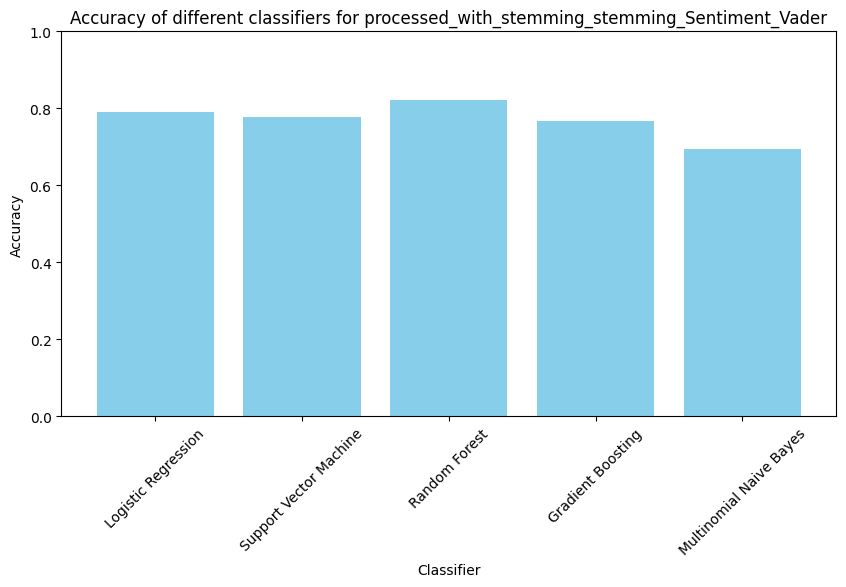

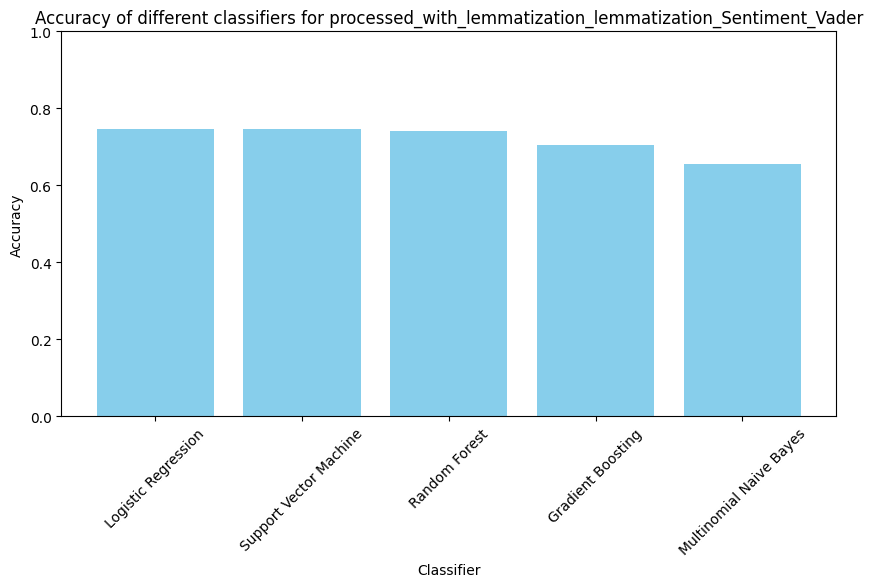

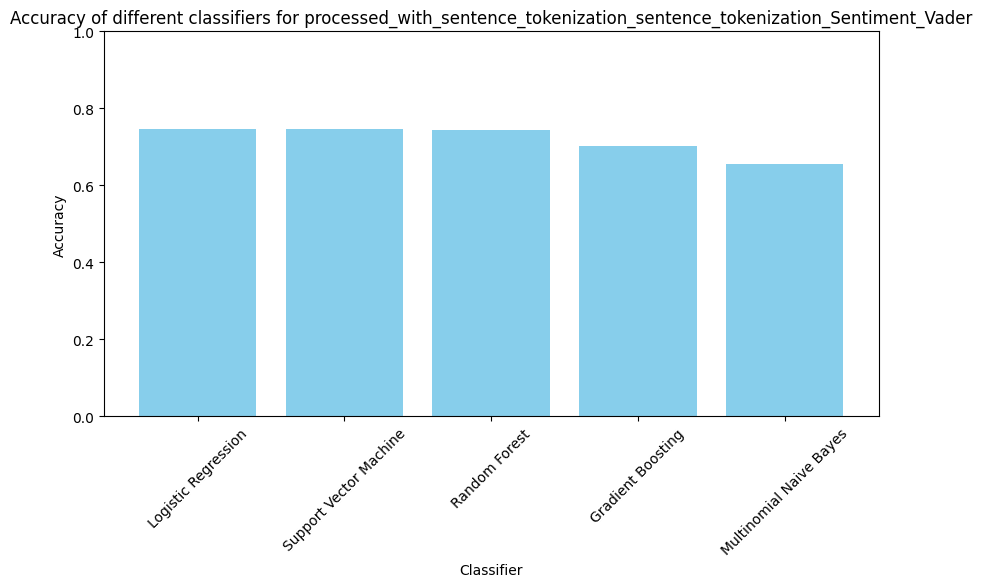

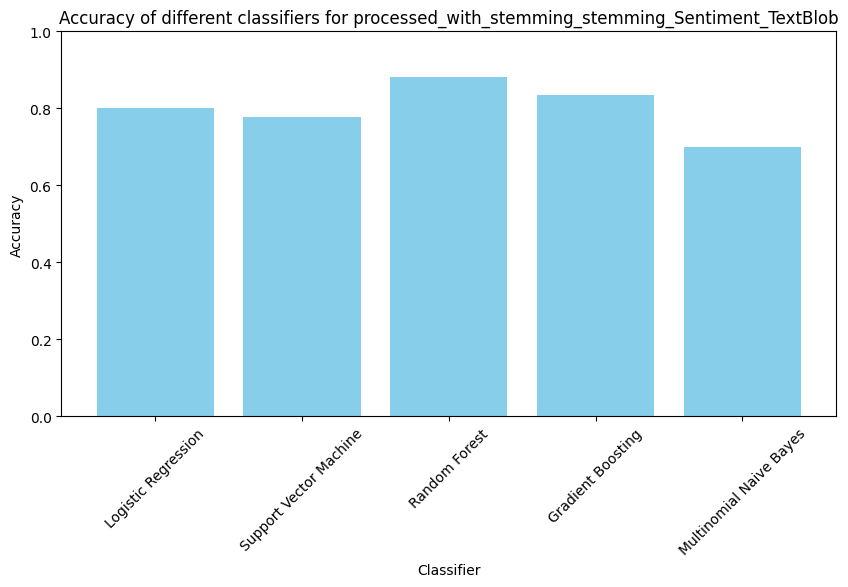

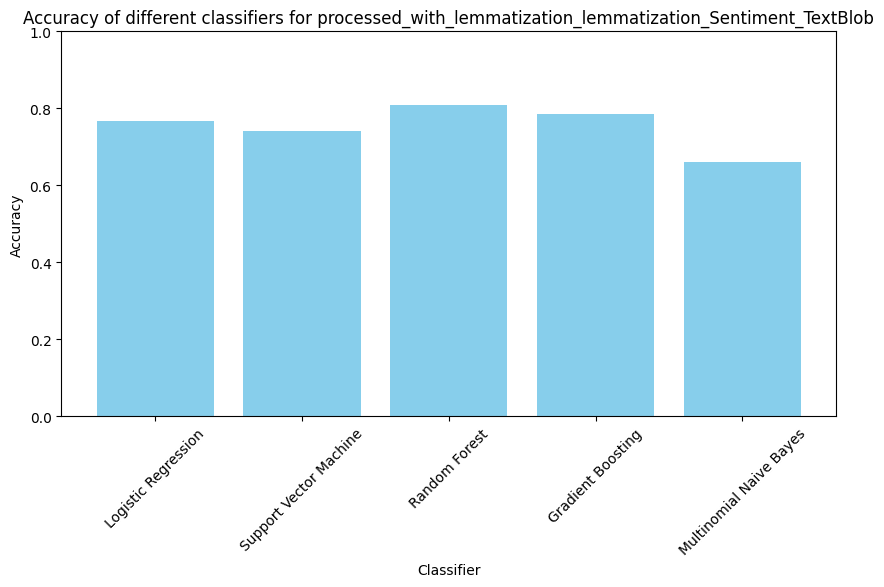

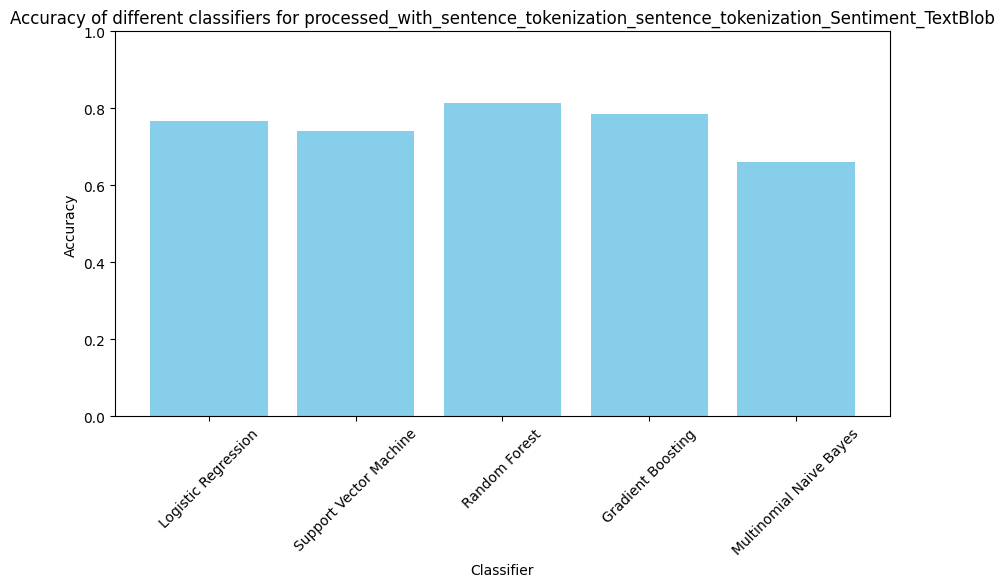

Method: processed_with_stemming_stemming_Sentiment_Vader_Logistic Regression
Accuracy: 0.7913602941176471
Classification Report: {'negative': {'precision': 0.8145161290322581, 'recall': 0.6917808219178082, 'f1-score': 0.7481481481481482, 'support': 292}, 'neutral': {'precision': 0.7610619469026548, 'recall': 0.947136563876652, 'f1-score': 0.84396467124632, 'support': 454}, 'positive': {'precision': 0.8327272727272728, 'recall': 0.6695906432748538, 'f1-score': 0.7423014586709886, 'support': 342}, 'accuracy': 0.7913602941176471, 'macro avg': {'precision': 0.8027684495540619, 'recall': 0.769502676356438, 'f1-score': 0.7781380926884855, 'support': 1088}, 'weighted avg': {'precision': 0.7979352581286323, 'recall': 0.7913602941176471, 'f1-score': 0.7862925724913297, 'support': 1088}}
Confusion Matrix: 
[[202  56  34]
 [ 12 430  12]
 [ 34  79 229]]


Method: processed_with_stemming_stemming_Sentiment_Vader_Support Vector Machine
Accuracy: 0.7775735294117647
Classification Report: {'negative':

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_processed is your DataFrame

# Step 1: Prepare the data by splitting it into training and testing sets
def prepare_data(df, text_column, label_column):
    X = df[text_column].fillna('')  # Fill NaNs with empty string
    y = df[label_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a separate model for each preprocessing method and classifier
def train_model(X_train, X_test, y_train, y_test, classifier):
    # Vectorize the text data
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, report, cm

# Define the methods to compare
methods = [
    ('processed_with_stemming', 'stemming_Sentiment_Vader'),
    ('processed_with_lemmatization', 'lemmatization_Sentiment_Vader'),
    ('processed_with_sentence_tokenization', 'sentence_tokenization_Sentiment_Vader'),
    ('processed_with_stemming', 'stemming_Sentiment_TextBlob'),
    ('processed_with_lemmatization', 'lemmatization_Sentiment_TextBlob'),
    ('processed_with_sentence_tokenization', 'sentence_tokenization_Sentiment_TextBlob')
]

# Define the classifiers to use
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Multinomial Naive Bayes': MultinomialNB()
}

# Step 3: Evaluate the performance of each model and collect accuracies
results = {}
accuracies = {}

for text_col, label_col in methods:
    method_name = f'{text_col}_{label_col}'
    accuracies[method_name] = {}
    X_train, X_test, y_train, y_test = prepare_data(df_processed, text_col, label_col)
    for clf_name, clf in classifiers.items():
        accuracy, report, cm = train_model(X_train, X_test, y_train, y_test, clf)
        results[f'{method_name}_{clf_name}'] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm
        }
        accuracies[method_name][clf_name] = accuracy

# Step 4: Plot the results
def plot_accuracies(accuracies):
    for method, scores in accuracies.items():
        plt.figure(figsize=(10, 5))
        plt.bar(scores.keys(), scores.values(), color='skyblue')
        plt.xlabel('Classifier')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.title(f'Accuracy of different classifiers for {method}')
        plt.xticks(rotation=45)
        plt.show()

# Call the plot function
plot_accuracies(accuracies)

# Print detailed results
for method, metrics in results.items():
    print(f"Method: {method}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report: {metrics['report']}")
    print(f"Confusion Matrix: \n{metrics['confusion_matrix']}")
    print("\n")
